# GliderTools demo

Demonstrate using GliderTools on some ESD glider data

In [1]:
import os
import glidertools as gt
from cmocean import cm as cmo  # we use this for colormaps
import xarray as xr

from subprocess import run

In [2]:
deployment = 'amlr08-20220513'
mode = 'delayed'
bucket_name = 'amlr-gliders-deployments-dev'

deployments_path = f'/home/sam_woodman_noaa_gov/{bucket_name}'
glider_path = os.path.join(deployments_path, 'SANDIEGO', '2022', deployment)

# cacdir = os.path.join(deployments_path, 'cache')
# binarydir = os.path.join(glider_path, 'data', 'binary', mode)
# deploymentyaml = os.path.join(glider_path, 'config', 
#                               f"{deployment}-{mode}.yml")

run(["fusermount", "-u", deployments_path])
run(["gcsfuse", "--implicit-dirs", bucket_name,  deployments_path])


{"timestamp":{"seconds":1727369200,"nanos":704139638},"severity":"INFO","message":"Start gcsfuse/2.4.0 (Go version go1.22.4) for app \"\" using mount point: /home/sam_woodman_noaa_gov/amlr-gliders-deployments-dev\n"}
{"timestamp":{"seconds":1727369200,"nanos":704287608},"severity":"INFO","message":"GCSFuse mount command flags: {\"AppName\":\"\",\"Foreground\":false,\"ConfigFile\":\"\",\"MountOptions\":{},\"DirMode\":493,\"FileMode\":420,\"Uid\":-1,\"Gid\":-1,\"ImplicitDirs\":true,\"OnlyDir\":\"\",\"RenameDirLimit\":0,\"IgnoreInterrupts\":true,\"CustomEndpoint\":null,\"BillingProject\":\"\",\"KeyFile\":\"\",\"TokenUrl\":\"\",\"ReuseTokenFromUrl\":true,\"EgressBandwidthLimitBytesPerSecond\":-1,\"OpRateLimitHz\":-1,\"SequentialReadSizeMb\":200,\"AnonymousAccess\":false,\"MaxRetrySleep\":30000000000,\"MaxRetryAttempts\":0,\"StatCacheCapacity\":20460,\"StatCacheTTL\":60000000000,\"TypeCacheTTL\":60000000000,\"KernelListCacheTtlSeconds\":0,\"HttpClientTimeout\":0,\"RetryMultiplier\":2,\"Temp

CompletedProcess(args=['gcsfuse', '--implicit-dirs', 'amlr-gliders-deployments-dev', '/home/sam_woodman_noaa_gov/amlr-gliders-deployments-dev'], returncode=0)

In [3]:
tsdir = os.path.join(glider_path, 'data', 'nc', 'L1-timeseries')

print(os.listdir(tsdir))
outname_tseng = os.path.join(tsdir, os.listdir(tsdir)[0]) #'amlr08-20220513T1817-eng.nc')
# '/home/sam_woodman_noaa_gov/amlr-gliders-deployments-dev/SANDIEGO/2022/amlr08-20220813/data/nc/L1-timeseries/amlr08-20220513T1817-eng.nc'
# '/home/sam_woodman_noaa_gov/amlr-gliders-deployments-dev/SANDIEGO/2022/amlr08-20220513/data/nc/L1-timeseries/amlr08-20220513T1817-eng.nc'

ds_eng = xr.open_dataset(outname_tseng)
x = ds_eng.profile_index
y = ds_eng.depth

ds_eng


['amlr08-20220513T1817-eng.nc', 'amlr08-20220513T1817-sci.nc']


<xarray.Dataset> Size: 6MB
Dimensions:                (time: 60002)
Coordinates:
  * time                   (time) datetime64[ns] 480kB 2022-05-13T18:13:42.53...
Data variables:
    latitude               (time) float64 480kB ...
    longitude              (time) float64 480kB ...
    depth                  (time) float64 480kB ...
    heading                (time) float64 480kB ...
    pitch                  (time) float64 480kB ...
    roll                   (time) float64 480kB ...
    total_num_inflections  (time) float64 480kB ...
    waypoint_latitude      (time) float64 480kB ...
    waypoint_longitude     (time) float64 480kB ...
    distance_over_ground   (time) float64 480kB ...
    profile_index          (time) float64 480kB ...
    profile_direction      (time) float64 480kB ...
Attributes: (12/61)
    Conventions:               CF-1.8
    Metadata_Conventions:      CF-1.6, Unidata Dataset Discovery v1.0
    acknowledgment:            This work was supported by funding from NOAA.
    acoustics:                 {'make_model': 'NORTEK Inc Signature 100 Compa...
    cdm_data_type:             Trajectory
    comment:                   engineering-only time series
    ...                        ...
    time_coverage_start:       2022-05-13T18:13:42.536999936
    title:                     amlr08-20220513T1813
    transmission_system:       IRIDIUM
    wmo_id:                     
    deployment_start:          2022-05-13T18:13:4
    deployment_end:            2022-05-13T18:13:4

In [4]:

outname_tssci = os.path.join(tsdir, os.listdir(tsdir)[1]) #'amlr08-20220513T1817-eng.nc')
ds_sci = xr.open_dataset(outname_tssci)
ds_sci

<xarray.Dataset> Size: 22MB
Dimensions:                (time: 113518)
Coordinates:
  * time                   (time) datetime64[ns] 908kB 2022-05-13T18:13:38.68...
Data variables: (12/23)
    latitude               (time) float64 908kB ...
    longitude              (time) float64 908kB ...
    depth                  (time) float64 908kB ...
    heading                (time) float64 908kB ...
    pitch                  (time) float64 908kB ...
    roll                   (time) float64 908kB ...
    ...                     ...
    salinity               (time) float64 908kB ...
    potential_density      (time) float64 908kB ...
    density                (time) float64 908kB ...
    potential_temperature  (time) float64 908kB ...
    profile_index          (time) float64 908kB ...
    profile_direction      (time) float64 908kB ...
Attributes: (12/61)
    Conventions:               CF-1.8
    Metadata_Conventions:      CF-1.6, Unidata Dataset Discovery v1.0
    acknowledgment:            This work was supported by funding from NOAA.
    acoustics:                 {'make_model': 'NORTEK Inc Signature 100 Compa...
    cdm_data_type:             Trajectory
    comment:                    
    ...                        ...
    time_coverage_start:       2022-05-13T18:13:38.687000064
    title:                     amlr08-20220513T1813
    transmission_system:       IRIDIUM
    wmo_id:                     
    deployment_start:          2022-05-13T18:13:3
    deployment_end:            2022-05-13T18:13:3

/opt/conda/envs/esdglider/lib/python3.12/site-packages/glidertools/mapping.py:969: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp = Series(z).groupby([x, bins])  # -DB put z into the many bins (like 2D hist)


<Axes: xlabel='Dives', ylabel='Depth (m)'>

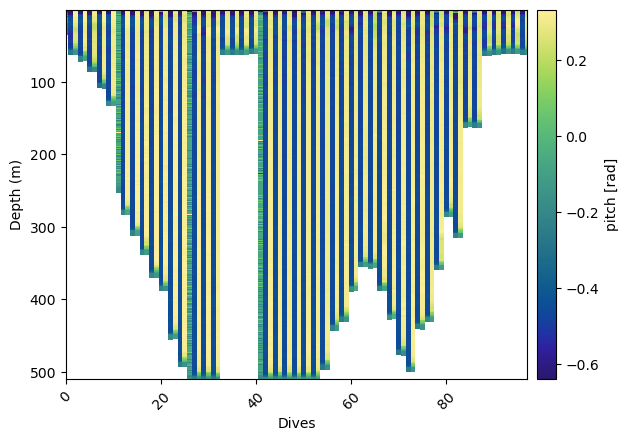

In [5]:
gt.plot(x, y, ds_eng.pitch, cmap=cmo.haline, robust=True)

/opt/conda/envs/esdglider/lib/python3.12/site-packages/glidertools/mapping.py:969: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp = Series(z).groupby([x, bins])  # -DB put z into the many bins (like 2D hist)


<Axes: xlabel='Dives', ylabel='Depth (m)'>

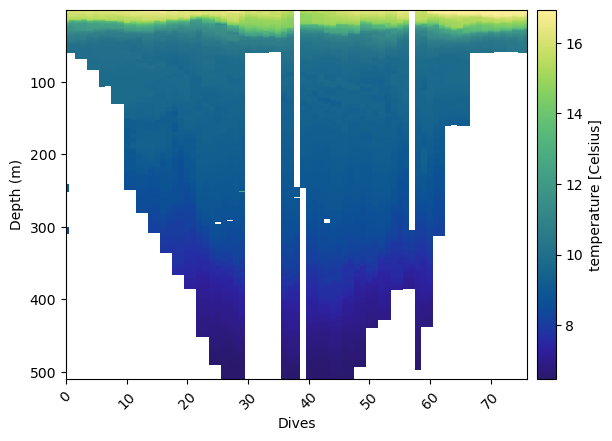

In [6]:
gt.plot(ds_sci.profile_index, ds_sci.depth, ds_sci.temperature, 
        cmap=cmo.haline, robust=True)